In [132]:
from tools import load
import numpy as np
import re
import math
import matplotlib.pyplot as plt

In [133]:
data = np.array(load(line_splitter=",", to_list=False)).astype(int)

In [134]:
def cost_update(c, costs, board):
    new_cost = costs[c[0], c[1]] + 1

    if c[0] != 0:
        if not board[c[0]-1, c[1]]:
            if new_cost < costs[c[0]-1, c[1]]:
                costs[c[0]-1, c[1]] = new_cost
                        
    if c[0] != (board.shape[0]-1):
        if not board[c[0]+1, c[1]]:
            if new_cost < costs[c[0]+1, c[1]]:
                costs[c[0]+1, c[1]] = new_cost
                        

    if c[1] != 0:
        if not board[c[0], c[1]-1]:
            if new_cost < costs[c[0], c[1]-1]:
                costs[c[0], c[1]-1] = new_cost
                        
    if c[1] != (board.shape[1]-1):
        if not board[c[0], c[1]+1]:
            if new_cost < costs[c[0], c[1]+1]:
                costs[c[0], c[1]+1] = new_cost


In [145]:
# Dikstras again?
def sp(grid, end):
    start = [0,0]
    end = [70,70]
    # Shortest path lets go. 

    unvisited = np.ones(grid.shape).astype(bool)
    unvisited[grid.astype(bool)] = False
    costs = np.zeros(grid.shape)
    costs[:,:] = np.inf
    costs[start[0], start[1]] = 0

    current_position = start

    while unvisited[end[0],end[1]]:
        cost_update(current_position, costs, grid)
        unvisited[current_position[0], current_position[1]] = False
        options = costs == costs[unvisited].min()
        options = np.where(options * unvisited)
        current_position = options[0][0], options[1][0]
    return costs


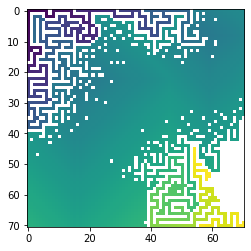

In [153]:
plt.imshow(costs)

In [158]:
# a
grid = np.zeros((71,71))
for x in data[:1024]: 
    grid[x[1], x[0]] = 1
sp(grid, end = [70,70])[-1,-1]

270.0

In [157]:
x[0]

TypeError: 'int' object is not subscriptable

In [159]:
# b
grid = np.zeros((71,71))
for x in data[:2524]: # still runs so we can search from here to make it quicker.
    grid[x[1], x[0]] = 1


for x in data[2524:]:
    try:
        grid[x[1], x[0]] = 1
        sp(grid, end = [70,70])[-1,-1]
    except: 
        print(x, "unreachable")
        break

[51 40] unreachable
